<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/PDSH-cover-small.png?raw=1">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

This notebook has been modified by Benjamín Valdés for  TC3006 to simplify the contents, for a more in depth explanation of SciKit please check the book directly.

## Scikit-Learn's Estimator API

The Scikit-Learn API is designed as outlined in the [Scikit-Learn API paper](http://arxiv.org/abs/1309.0238).

- *Consistency*: All objects share a common interface drawn from a limited set of methods, with consistent documentation.

- *Inspection*: All specified parameter values are exposed as public attributes.

- *Limited object hierarchy*: Only algorithms are represented by Python classes; datasets are represented
  in standard formats (NumPy arrays, Pandas ``DataFrame``s, SciPy sparse matrices) and parameter
  names use standard Python strings.

- *Composition*: Many machine learning tasks can be expressed as sequences of more fundamental algorithms,
  and Scikit-Learn makes use of this wherever possible.

- *Sensible defaults*: When models require user-specified parameters, the library defines an appropriate default value.

In practice, these principles make Scikit-Learn very easy to use, once the basic principles are understood.
Every machine learning algorithm in Scikit-Learn is implemented via the Estimator API, which provides a consistent interface for a wide range of machine learning applications.

### Basics of the API

Most commonly, the steps in using the Scikit-Learn estimator API are as follows:

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion above.
4. Fit the model to your data by calling the ``fit()`` method of the model instance.
5. Apply the Model to new data:
   - For supervised learning, often we predict labels for unknown data using the ``predict()`` method.
   - For unsupervised learning, we often transform or infer properties of the data using the ``transform()`` or ``predict()`` method.

We will now step through several simple examples of applying supervised and unsupervised learning methods.

### Supervised learning example: Simple linear regression

As an example of this process, let's consider a simple linear regression—that is, the common case of fitting a line to $(x, y)$ data.
We will use the following simple data for our regression example:

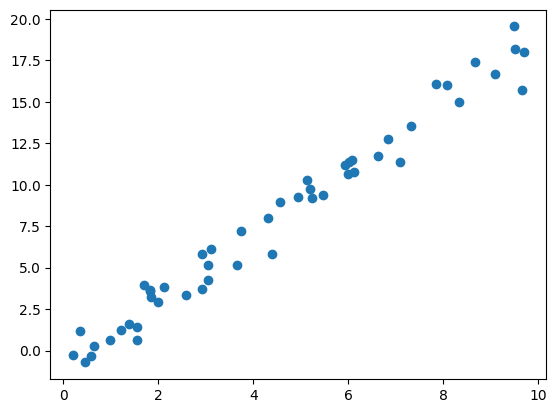

In [35]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

With this data in place, we can use the recipe outlined earlier. Let's walk through the process: 

#### 1. Choose a class of model

In Scikit-Learn, every class of model is represented by a Python class.
So, for example, if we would like to compute a simple linear regression model, we can import the linear regression class:

In [10]:
from sklearn.linear_model import LinearRegression

#### 2. Choose model hyperparameters

For our linear regression example, we can instantiate the ``LinearRegression`` class and specify that we would like to fit the intercept using the ``fit_intercept`` hyperparameter:

In [11]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

Keep in mind that when the model is instantiated, the only action is the storing of these hyperparameter values.
In particular, we have not yet applied the model to any data: the Scikit-Learn API makes very clear the distinction between *choice of model* and *application of model to data*.

#### 3. Arrange data into a features matrix and target vector

Previously we detailed the Scikit-Learn data representation, which requires a two-dimensional features matrix and a one-dimensional target array.
Here our target variable ``y`` is already in the correct form (a length-``n_samples`` array), but we need to massage the data ``x`` to make it a matrix of size ``[n_samples, n_features]``.
In this case, this amounts to a simple reshaping of the one-dimensional array:

In [15]:
X = x[:, np.newaxis]
X.shape

(50, 1)

#### 4. Fit the model to your data

Apply our model to data with the ``fit()`` method of the model object

In [18]:
model.fit(X, y)

LinearRegression()

This ``fit()`` command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore.
In Scikit-Learn, by convention all model parameters that were learned during the ``fit()`` process have trailing underscores; for example in this linear model, we have the following:

In [19]:
model.coef_ # This is the parameter value

array([1.9776566])

In [20]:
model.intercept_ # This is the bias value

-0.903310725531111

#### 5. Predict labels for unknown data

Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data that was not part of the training set.
In Scikit-Learn, this can be done using the ``predict()`` method.
For the sake of this example, our "new data" will be a grid of *x* values, and we will ask what *y* values the model predicts:

In [21]:
xfit = np.linspace(-1, 11)
xfit

array([-1.        , -0.75510204, -0.51020408, -0.26530612, -0.02040816,
        0.2244898 ,  0.46938776,  0.71428571,  0.95918367,  1.20408163,
        1.44897959,  1.69387755,  1.93877551,  2.18367347,  2.42857143,
        2.67346939,  2.91836735,  3.16326531,  3.40816327,  3.65306122,
        3.89795918,  4.14285714,  4.3877551 ,  4.63265306,  4.87755102,
        5.12244898,  5.36734694,  5.6122449 ,  5.85714286,  6.10204082,
        6.34693878,  6.59183673,  6.83673469,  7.08163265,  7.32653061,
        7.57142857,  7.81632653,  8.06122449,  8.30612245,  8.55102041,
        8.79591837,  9.04081633,  9.28571429,  9.53061224,  9.7755102 ,
       10.02040816, 10.26530612, 10.51020408, 10.75510204, 11.        ])

As before, we need to coerce these *x* values into a ``[n_samples, n_features]`` features matrix, after which we can feed it to the model:

In [22]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
yfit

array([-2.88096733, -2.39664326, -1.9123192 , -1.42799513, -0.94367106,
       -0.459347  ,  0.02497707,  0.50930113,  0.9936252 ,  1.47794926,
        1.96227333,  2.44659739,  2.93092146,  3.41524552,  3.89956959,
        4.38389366,  4.86821772,  5.35254179,  5.83686585,  6.32118992,
        6.80551398,  7.28983805,  7.77416211,  8.25848618,  8.74281024,
        9.22713431,  9.71145837, 10.19578244, 10.68010651, 11.16443057,
       11.64875464, 12.1330787 , 12.61740277, 13.10172683, 13.5860509 ,
       14.07037496, 14.55469903, 15.03902309, 15.52334716, 16.00767122,
       16.49199529, 16.97631936, 17.46064342, 17.94496749, 18.42929155,
       18.91361562, 19.39793968, 19.88226375, 20.36658781, 20.85091188])

Finally, let's visualize the results by plotting first the raw data, and then this model fit:

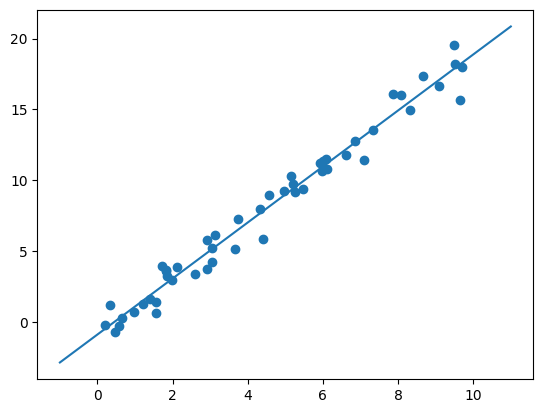

In [26]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

### Practice SciKit-Learn

Load the wine dataset and create a regression model that predicts the level of alcohol the model has using SciKit.  To feed dataframes into Sklearn sometimes you need to reformat them, here is an example of how to do that [Pandas with SKlearn](https://www.ritchieng.com/pandas-scikit-learn/).

If you only want to remove the class column and use as a target you can also do :

      X = df.drop(['target_column_name'], axis = 1)  
      y = df['target_column_name']       



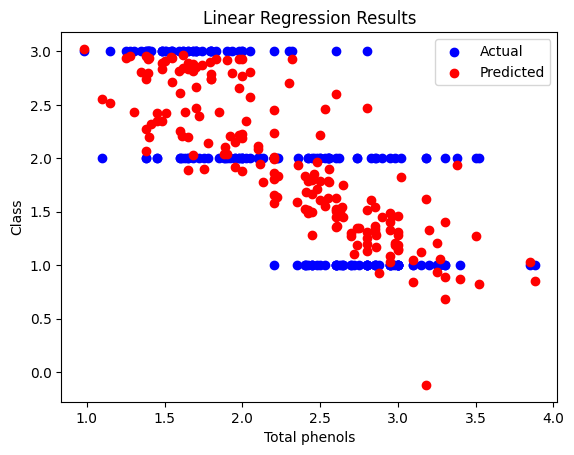

In [83]:
# Load the wine data set into a Dataframe
import pandas as pd
columns = ["class","Alcohol","Malic Acid", "Ash", "Alcalinity of Ash","Magnesium","Total phenols","Flavanoids","Nonflavanoid Phenols","Proanthocyanins","Color Intensity","Hue","OD280/OD315 of diluted wines","Proline"]
df = pd.read_csv('../DataSets/wine.data',names = columns)


# Choose 2 variables as your X and the degree of wine as your Y
X = df[['Total phenols', 'Flavanoids']]
Y = df['class']


# Reformat the Dataframes X and Y into NumPy arrays (only if necesarry) in a shape that SciKit can process it
X.to_numpy()
Y.to_numpy()

# Chose a regression model
model = LinearRegression(fit_intercept=True)


# Fit the model
model.fit(X,Y)


# Make predictions with the model
Y_pred = model.predict(X)
Y_pred

plt.scatter(X['Total phenols'], Y, color='blue', label='Actual')
plt.scatter(X['Total phenols'], Y_pred, color='red', label='Predicted')
plt.xlabel('Total phenols')
plt.ylabel('Class')
plt.title('Linear Regression Results')
plt.legend()
plt.show()



### Supervised learning example: Iris classification

Let's take a look at another example of this process, using the Iris dataset we discussed earlier.
Our question will be this: given a model trained on a portion of the Iris data, how well can we predict the remaining labels?

For this task, we will use an extremely simple generative model known as Gaussian naive Bayes, which proceeds by assuming each class is drawn from an axis-aligned Gaussian distribution (see [In Depth: Naive Bayes Classification](05.05-Naive-Bayes.ipynb) for more details).
Because it is so fast and has no hyperparameters to choose, Gaussian naive Bayes is often a good model to use as a baseline classification, before exploring whether improvements can be found through more sophisticated models.

We would like to evaluate the model on data it has not seen before, and so we will split the data into a *training set* and a *testing set*.
This could be done by hand, but it is more convenient to use the ``train_test_split`` utility function:

In [84]:
import seaborn as sns                            
iris = sns.load_dataset('iris')                   # 1. Get the dataset   
print(iris.head())

X_iris = iris.drop(['species'], axis = 1)         # 2. Get instances
print(X_iris.head())

y_iris = iris['species']                          # 3. Get clases
print(y_iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object


In [85]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

With the data arranged, we can follow our recipe to predict the labels:

In [88]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

Finally, we can use the ``accuracy_score`` utility to see the fraction of predicted labels that match their true value:

In [90]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

With an accuracy topping 97%, we see that even this very naive classification algorithm is effective for this particular dataset!

### Unsupervised learning example: Iris dimensionality

As an example of an unsupervised learning problem, let's take a look at reducing the dimensionality of the Iris data so as to more easily visualize it.
Recall that the Iris data is four dimensional: there are four features recorded for each sample.

The task of dimensionality reduction is to ask whether there is a suitable lower-dimensional representation that retains the essential features of the data.
Often dimensionality reduction is used as an aid to visualizing data: after all, it is much easier to plot data in two dimensions than in four dimensions or higher!

Here we will use principal component analysis (PCA; see [In Depth: Principal Component Analysis](05.09-Principal-Component-Analysis.ipynb)), which is a fast linear dimensionality reduction technique.
We will ask the model to return two components—that is, a two-dimensional representation of the data.

Following the sequence of steps outlined earlier, we have:

In [91]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

Now let's plot the results. A quick way to do this is to insert the results into the original Iris ``DataFrame``, and use Seaborn's ``lmplot`` to show the results:

In [96]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
iris

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.944110,0.187532
146,6.3,2.5,5.0,1.9,virginica,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,virginica,1.764346,0.078859
148,6.2,3.4,5.4,2.3,virginica,1.900942,0.116628


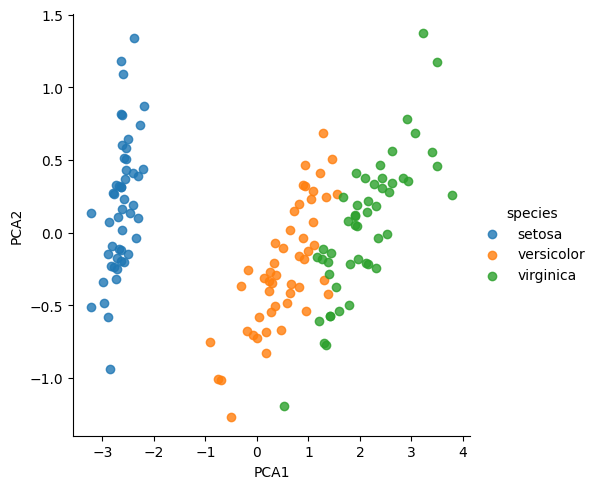

In [98]:
sns.lmplot(x = "PCA1", y ="PCA2", hue='species', data=iris, fit_reg=False);

We see that in the two-dimensional representation, the species are fairly well separated, even though the PCA algorithm had no knowledge of the species labels!
This indicates to us that a relatively straightforward classification will probably be effective on the dataset, as we saw before.